In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
sns.set()

import itertools

In [181]:
def train(X_tr,y_tr,epocas=50):
    w=np.random.rand(X_tr.shape[1]+1,1) #pesos
    umbral = 0
    eta = 0.1 # tasa de aprendizaje
    X_mod = np.concatenate([np.ones([len(X_tr),1]),X_tr],axis=1)
    y_estim = ((X_mod @ w)>umbral).astype(int)
    for i in range(epocas):
        #y_tr=y_tr.to_numpy().reshape(len(X_mod),1)
        #print(y_tr.values.reshape(len(y_estim),1))

        #print('X_mod.T.shape: ',X_mod.T.shape,'\n')
        #print('y_tr.shape: ',y_tr.shape,'\n')
        #print('y_estim.shape: ',y_estim.shape,'\n\n')

        dw = eta *X_mod.T @ (y_tr - y_estim) #.values.reshape(len(X_mod),1)
        #print('dw.shape: ',dw.shape,'\n\n')
        w = w + dw
        y_estim = ((X_mod @ w)>umbral).astype(int)
        #print('y_estim.shape: ',y_estim.shape,'\n\n')
    return w


In [182]:
def predict(X_tes,y_tes,w):
    """
    Retorna un arreglo con las predicciiones de cada una de las clases
    args:
        X_tes: datos de prueba
        y_tes: etiquetas para datos de prueba
    returns:
        arreglo con predicciones 1 o 0 para cada fila de la matriz X_tes
    """
    umbral = 0
    X_mod = np.concatenate([np.ones([len(X_tes),1]),X_tes],axis=1)
    y_estim = ((X_mod @ w)>umbral).astype(int)
    #print('y_estim.shape: ',y_estim.shape,'\n\n')
    return y_estim

In [183]:
iris = load_iris()
X = iris.data
y = np.reshape(iris.target,[len(X),1])
# Tomamos los primeros 100 datos (con las 2 primeras clases)
X = X[:100,:]
y = y[:100,:]

In [184]:
def plot_data(data_X,y_lab,i,j,var_names):
    col = {0:"r",
           1:"b"}
    for r in range(len(data_X)):
        plt.scatter(data_X[r,i],data_X[r,j],color=col[y_lab[r][0]])
        plt.xlabel(var_names[i])
        plt.ylabel(var_names[j])

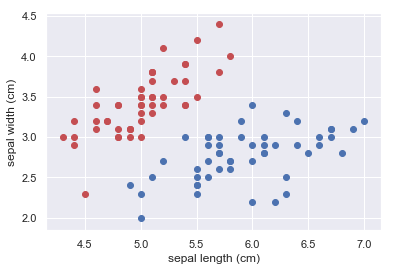

In [185]:
plot_data(X,y,0,1,iris.feature_names)

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [187]:
w=train(X_train,y_train)

In [188]:
y_pred=predict(X_test,y_test,w)
y_pred.T

array([[1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 1, 0, 0, 1, 0, 1]])

In [189]:
y_test.T

array([[1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 1, 0, 0, 1, 0, 1]])

In [190]:
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))

Accuracy:  1.0
Precision:  1.0


## Creando el dataframe para preceptron logico

In [191]:
n=5000
data=np.random.randint(0,2,size = (n,2))
import pandas as pd
df=pd.DataFrame(data,columns=['x1','x2'])
df['y_and']=df['x1']&df['x2'] #and
df['y_or']=df['x1']|df['x2'] #or
df["y_xor"]=df["x1"]^df["x2"] #xor
df["y_xnor"]=((df["x1"]+df["x2"])!=1).astype(int) #xnor
df.head()

,x1,x2,y_and,y_or,y_xor,y_xnor
0,1,1,1,1,0,1
1,0,1,0,1,1,0
2,1,1,1,1,0,1
3,1,1,1,1,0,1
4,1,1,1,1,0,1


### Ahora con AND

In [192]:
X = df[["x1","x2"]].values#.to_numpy()
X.shape

(5000, 2)

In [193]:
y = df[["y_and"]].values
y=y.reshape(len(y),1)
y.shape

(5000, 1)

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)
X_train.shape

(3750, 2)

In [195]:
w=train(X_train,y_train)
w.shape # 3 pesos: 2 para cada x + 1 del sesgo

(3, 1)

In [196]:
y_pred=predict(X_test,y_test,w)
y_pred.T

array([[0, 1, 0, ..., 0, 0, 0]])

In [197]:
y_test.T

array([[0, 1, 0, ..., 0, 0, 0]])

In [198]:
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))

Accuracy:  1.0
Precision:  1.0


#### Ahora con OR

In [199]:
y = df["y_or"].values
y=y.reshape(len(y),1)
y.shape

(5000, 1)

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)
X_train.shape

(3750, 2)

In [201]:
w=train(X_train,y_train)
w.shape

(3, 1)

In [202]:
y_pred=predict(X_test,y_test,w)
y_pred.T

array([[1, 1, 1, ..., 0, 1, 1]])

In [203]:
y_test.T

array([[1, 1, 1, ..., 0, 1, 1]])

In [204]:
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))

Accuracy:  1.0
Precision:  1.0


#### Ahora con XOR

In [205]:
y = df["y_xor"].values.reshape(n,1)
y.shape

(5000, 1)

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
X_train.shape

(3500, 2)

In [207]:
w=train(X_train,y_train)
w.shape

(3, 1)

In [208]:
y_pred=predict(X_test,y_test,w)
y_pred.T

array([[1, 1, 1, ..., 1, 1, 1]])

In [209]:
y_test.T

array([[1, 0, 1, ..., 1, 1, 1]])

In [210]:
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))

Accuracy:  0.496
Precision:  0.496


#### Ahora con XNOR

In [163]:
y = df["y_xnor"].values.reshape(n,1)
y.shape

(5000, 1)

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)
X_train.shape

(3750, 2)

In [165]:
w=train(X_train,y_train,300)
w.shape

(3, 1)

In [169]:
y_pred=predict(X_test,y_test,w)
y_pred.T

array([[0, 0, 0, ..., 0, 0, 0]])

In [170]:
y_test.T

array([[1, 1, 0, ..., 0, 1, 0]])

In [171]:
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))

Accuracy:  0.4912
Precision:  0.0


C:\Users\juank\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [172]:
w

array([[-167.50067069],
       [ -25.37698937],
       [ -15.76484078]])

## Adaline

In [231]:
def train_adaline(X_tr,y_tr,epocas=1000):
    w=np.random.rand(X_tr.shape[1]+1,1) #pesos
    print("pesos iniciales:")
    print(w)
    X_mod = np.concatenate([np.ones([len(X_tr),1]),X_tr],axis=1)
    etha=10**(-11)
    print('X_mod.T.shape: ',X_mod.T.shape,'\n')
    print('y_tr.shape: ',y_tr.shape,'\n')
    print('X_mod.shape: ',X_tr.shape,'\n')
    print('w.shape: ',w.shape,'\n\n')
    for i in range(epocas):
        dw=-etha*X_mod.T @ (y_tr-X_mod@w)
        w=w+dw
    return w
    

## Prueba de adaline con datos iris

In [232]:
iris = load_iris()
X = iris.data
y = np.reshape(iris.target,[len(X),1])
# Tomamos los primeros 100 datos (con las 2 primeras clases)
X = X[:100,:]
y = y[:100,:]
X.shape

(100, 4)

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape

(70, 4)

In [234]:
w=train_adaline(X_train,y_train)
w

pesos iniciales:
[[0.39379912]
 [0.35405579]
 [0.45453139]
 [0.92224083]
 [0.19059254]]
X_mod.T.shape:  (5, 70) 

y_tr.shape:  (70, 1) 

X_mod.shape:  (70, 4) 

w.shape:  (5, 1) 




array([[0.39380333],
       [0.35407938],
       [0.45454422],
       [0.92225405],
       [0.19059632]])

In [235]:
y_pred=predict(X_test,y_test,w)
y_pred.T

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1]])